In [1]:
import pandas as pd
import numpy as np
from iminuit import Minuit
import matplotlib.pyplot as plt

/home/ishara/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [4]:
def model_function(qT, m):
    return 1/(2*np.pi*m) * np.exp(-qT**2/(2*m))


functions_results = pd.read_csv("comparison_results.csv")


qT = np.array(functions_results['qT'])
SqTmean = np.array(functions_results['SqT_mean'])
SqTstd = np.array(functions_results['SqT_std'])

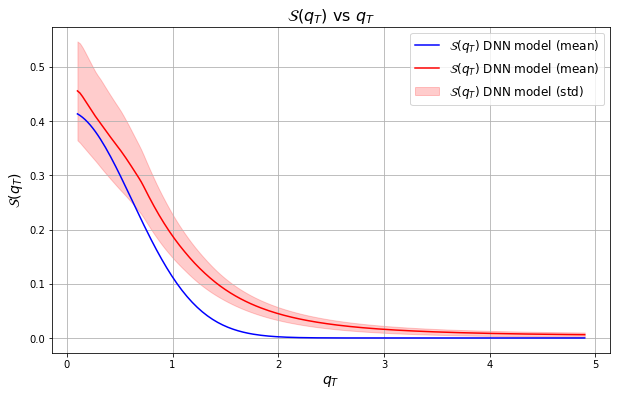

In [5]:
SqT_model = np.array(model_function(qT,0.38))


# ####### Plot SqT ############
plt.figure(1,figsize=(10, 6))
plt.plot(qT, SqT_model, label='$\mathcal{S}(q_T)$ DNN model (mean)', linestyle='-', color='blue')
plt.plot(qT, SqTmean, label='$\mathcal{S}(q_T)$ DNN model (mean)', linestyle='-', color='red')
plt.fill_between(qT, SqTmean - SqTstd, SqTmean + SqTstd, color='red', alpha=0.2, label='$\mathcal{S}(q_T)$ DNN model (std)')
plt.xlabel(r'$q_T$', fontsize=14)
plt.ylabel(r'$\mathcal{S}(q_T)$', fontsize=14)
plt.title('$\mathcal{S}(q_T)$ vs $q_T$', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)


In [12]:
from iminuit.cost import LeastSquares
least_squares = LeastSquares(qT, SqT_mean, SqT_std, model_function)


m_initial_guess = 0.3  
minuit = Minuit(least_squares, m=m_initial_guess)


minuit.limits["m"] = (0, 3.0)  # m should be positive


minuit.migrad()
minuit.hesse()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 917.6 (χ²/ndof = 4.6)      │              Nfcn = 31               │
│ EDM = 7.67e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ m    │   1.28    │   0.11    │            │            │    0    │    3    │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬────────┐
│   │      m │
├───┼────────┤
│ m │ 0.0118 │
└───┴────────┘

In [21]:
import pandas as pd
import numpy as np
from iminuit import Minuit
import matplotlib.pyplot as plt

def model_function(qT, m):
    return 1/(2*np.pi*m) * np.exp(-qT**2/(2*m))


functions_results = pd.read_csv("comparison_results.csv")


qT = np.array(functions_results['qT'])
SqTmean = np.array(functions_results['SqT_mean'])
SqTstd = np.array(functions_results['SqT_std'])


def chi2(m):
    yth = model_function(qT,m)
    yexp = SqTmean
    yerr = SqTstd
    tempChi2=np.sum(((yth-yexp))**2)
    return tempChi2

m_initial_guess = 0.4  
minuit = Minuit(chi2, m=m_initial_guess)


minuit.limits["m"] = (0, 1.0)  # m should be positive


minuit.migrad()
minuit.hesse()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 0.3232                     │              Nfcn = 21               │
│ EDM = 3.02e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ m    │   0.35    │   0.22    │            │            │    0    │    1    │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬────────┐
│   │      m │
├───┼────────┤
│ m │ 0.0505 │
└───┴────────┘

0.353657452944733


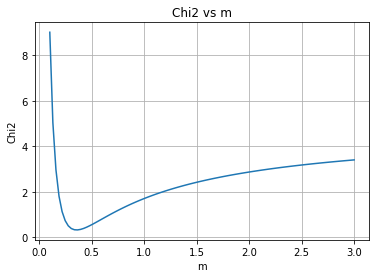

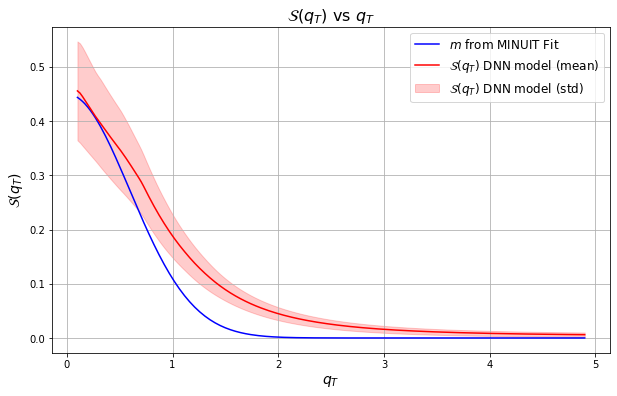

In [30]:
import pandas as pd
import numpy as np
from iminuit import Minuit
import matplotlib.pyplot as plt

def model_function(qT, m):
    return 1/(2*np.pi*m) * np.exp(-qT**2/(2*m))


functions_results = pd.read_csv("comparison_results.csv")


qT = np.array(functions_results['qT'])
SqTmean = np.array(functions_results['SqT_mean'])
SqTstd = np.array(functions_results['SqT_std'])


def chi2(m):
    yth = model_function(qT,m)
    yexp = SqTmean
    yerr = SqTstd
    tempChi2=np.sum(((yth-yexp))**2)
    return tempChi2

m_initial_guess = 0.4  
minuit = Minuit(chi2, m=m_initial_guess)


minuit.limits["m"] = (0, 1.0)  # m should be positive


minuit.migrad()
minuit.hesse()

m_solution = minuit.values["m"]
print(minuit.values["m"])


ms = np.linspace(0.1, 3.0, 100)
chi2_vals = [chi2(m) for m in ms]
plt.plot(ms, chi2_vals)
plt.xlabel("m")
plt.ylabel("Chi2")
plt.title("Chi2 vs m")
plt.grid()
plt.show()


SqT_model = np.array(model_function(qT,m_solution))


# ####### Plot SqT ############
plt.figure(1,figsize=(10, 6))
plt.plot(qT, SqT_model, label='$m$ from MINUIT Fit', linestyle='-', color='blue')
plt.plot(qT, SqTmean, label='$\mathcal{S}(q_T)$ DNN model (mean)', linestyle='-', color='red')
plt.fill_between(qT, SqTmean - SqTstd, SqTmean + SqTstd, color='red', alpha=0.2, label='$\mathcal{S}(q_T)$ DNN model (std)')
plt.xlabel(r'$q_T$', fontsize=14)
plt.ylabel(r'$\mathcal{S}(q_T)$', fontsize=14)
plt.title('$\mathcal{S}(q_T)$ vs $q_T$', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)
plt.savefig('Fit_Results_for_Sqt.pdf')